# **Import & Examine Kaggle's Dataset (UCI repo id=967)**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
!pip install seaborn
import seaborn as sns

In [ ]:
"""pip install ucimlrepo
from ucimlrepo import fetch_ucirepo

# fetch dataset
phiusiil_phishing_url_website = fetch_ucirepo(id=967)

# data (as pandas dataframes)
X = phiusiil_phishing_url_website.data.features
y = phiusiil_phishing_url_website.data.targets

# metadata
print(phiusiil_phishing_url_website.metadata)"""

'pip install ucimlrepo\nfrom ucimlrepo import fetch_ucirepo\n\n# fetch dataset\nphiusiil_phishing_url_website = fetch_ucirepo(id=967)\n\n# data (as pandas dataframes)\nX = phiusiil_phishing_url_website.data.features\ny = phiusiil_phishing_url_website.data.targets\n\n# metadata\nprint(phiusiil_phishing_url_website.metadata)'

In [ ]:
# Kaggle's version has been cleaned using outlier removal and feature selection techniques

csv_path = "/content/drive/MyDrive/AI_Subjects/ML/phishing_url_website.csv"
data = pd.read_csv(csv_path, encoding='utf-8')

# Separate features (all columns except the last) and target label (last column)
X = data.iloc[:, :-1]  # Select all columns except the last (slicing)
y = data.iloc[:, -1]     # Select the last column

print("Type of X:",type(X))

Type of X: <class 'pandas.core.frame.DataFrame'>


Check columns' names and datatypes => Category columns' datatype is 'INT'

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176262 entries, 0 to 176261
Data columns (total 20 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   URL                         176262 non-null  object 
 1   Domain                      176262 non-null  object 
 2   TLD                         176262 non-null  object 
 3   URLSimilarityIndex          176262 non-null  float64
 4   NoOfOtherSpecialCharsInURL  176262 non-null  int64  
 5   SpacialCharRatioInURL       176262 non-null  float64
 6   IsHTTPS                     176262 non-null  int64  
 7   LineOfCode                  176262 non-null  int64  
 8   Title                       176262 non-null  object 
 9   DomainTitleMatchScore       176262 non-null  float64
 10  URLTitleMatchScore          176262 non-null  float64
 11  IsResponsive                176262 non-null  int64  
 12  HasDescription              176262 non-null  int64  
 13  HasSocialNet  

In [ ]:
data.describe()

,URLSimilarityIndex,NoOfOtherSpecialCharsInURL,SpacialCharRatioInURL,IsHTTPS,LineOfCode,DomainTitleMatchScore,URLTitleMatchScore,IsResponsive,HasDescription,HasSocialNet,HasSubmitButton,HasCopyrightInfo,NoOfImage,NoOfJS,NoOfSelfRef,label
count,176262.000000,176262.000000,176262.000000,176262.000000,176262.000000,176262.000000,176262.000000,176262.000000,176262.000000,176262.000000,176262.000000,176262.000000,176262.000000,176262.000000,176262.000000,176262.000000
mean,81.888863,1.906395,0.060528,0.790437,841.568909,51.784938,53.750502,0.633784,0.447136,0.461631,0.386788,0.486009,19.612026,9.449927,53.554306,0.591307
std,25.176279,1.513070,0.029009,0.406998,1257.005436,49.665737,49.525475,0.481771,0.497199,0.498527,0.487016,0.499806,30.248986,12.019118,80.136652,0.491594
min,5.206704,1.000000,0.018000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,63.706267,1.000000,0.038000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,100.000000,1.000000,0.048000,1.000000,418.000000,100.000000,100.000000,1.000000,0.000000,0.000000,0.000000,0.000000,9.000000,6.000000,14.000000,1.000000
75%,100.000000,2.000000,0.080000,1.000000,1117.000000,100.000000,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,27.000000,14.000000,81.000000,1.000000
max,100.000000,12.000000,0.160000,1.000000,11400.000000,100.000000,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,264.000000,77.000000,595.000000,1.000000


In [ ]:
X = X.select_dtypes(exclude=['object'])

**Check number of labels**

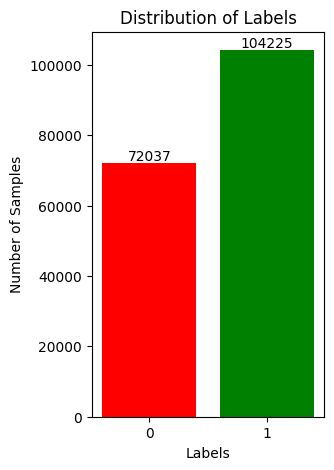

In [ ]:
count_0 = 0
count_1 = 0

# Loop through y and count labels
for label in y.values.flatten():
    if label == 0:
        count_0 += 1
    elif label == 1:
        count_1 += 1

labels = ['0', '1']
counts = [count_0, count_1]
colors = ['red', 'green']

plt.figure(figsize=(3, 5))  # Adjust figure size as needed
plt.bar(labels, counts, color=colors)
plt.xlabel('Labels')
plt.ylabel('Number of Samples')
plt.title('Distribution of Labels')

# Add text annotations to the bars
for i, count in enumerate(counts):
  plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()

<Axes: >

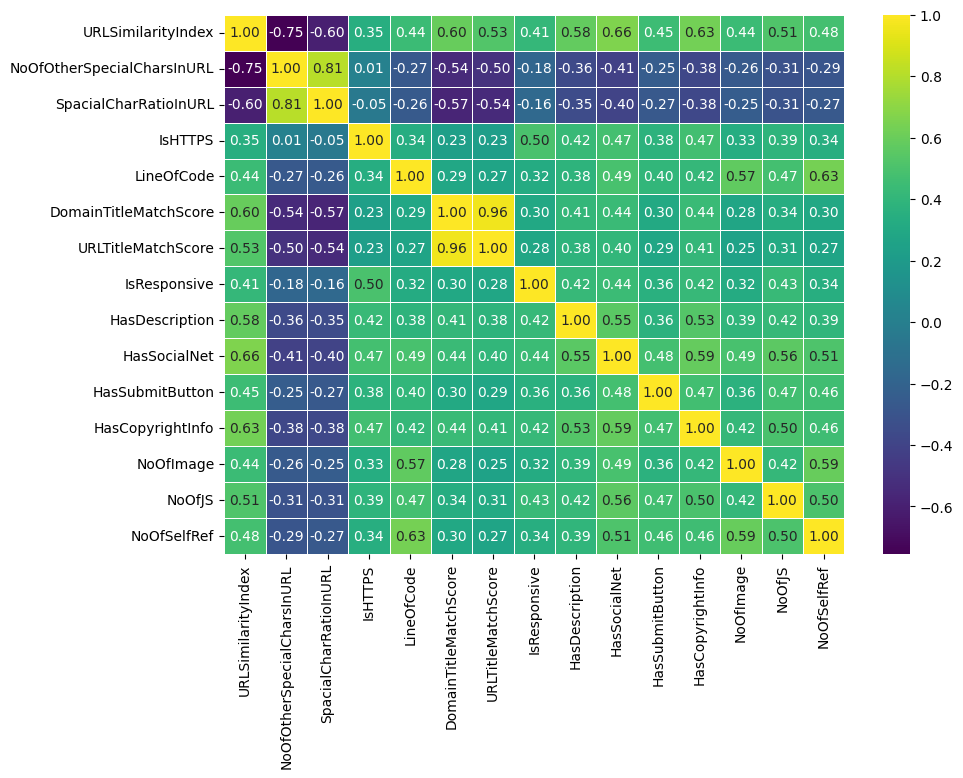

In [ ]:
plt.figure(figsize=(10, 7), dpi=100)
sns.heatmap(X.corr(),
            cmap="viridis", linecolor="white",
            linewidths=0.5, annot=True, fmt=".2f")

**Split the data into train, validation and test sets (80% training, 20% testing)**

In [ ]:
from sklearn.model_selection import train_test_split
# Dealing with imbalanced datasets: ensures consistent class proportions between training and testing sets, which leads to more reliable model evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train = scaler.fit_transform(X_train)

# Transform the test and validation sets using the same scaler
X_test = scaler.transform(X_test)

In [ ]:
print ('The shape of X_train is: ' + str(X_train.shape))
print ('The shape of X_test is: ' + str(X_test.shape))
print ('The shape of y_train is: ' + str(y_train.shape))
print ('The shape of y_test is: ' + str(y_test.shape))
print(type(X_train))
print(type(y_train))

The shape of X_train is: (141009, 15)
The shape of X_test is: (35253, 15)
The shape of y_train is: (141009,)
The shape of y_test is: (35253,)
<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>


In [ ]:
y_train, y_test = y_train.to_numpy(), y_test.to_numpy()

# **Processing code**

##**Feature Scaling**

In [ ]:
def scale_features(df):
    scaled_df = df.copy()

    for column_name in df.columns:
        distinct_values = df[column_name].unique()
        num_distinct = len(distinct_values)

        std_dev = df[column_name].std()
        if std_dev != 0:  # Handle cases where standard deviation is zero
            scaled_df[column_name] = (df[column_name] - df[column_name].mean()) / std_dev
        else:
            print(f"Column {column_name} has a standard deviation of 0. Skipping scaling.")

    return scaled_df

##**Title**

In [ ]:
def sigmoid(z):
    g = 1 / (1 + np.exp(-z))
    g = np.clip(g, 1e-15, 1 - 1e-15)
    return g


def compute_cost(X, y, w, b):
    m, n = X.shape

    cost = 0
    for i in range(m):
        z = np.dot(X[i], w) + b
        f = sigmoid(z)

        cost += -y[i] * np.log(f) - (1-y[i]) * np.log(1-f)

    total_cost = cost/m
    return total_cost


def compute_gradient(X, y, w, b):

    m, n = X.shape
    Jw = np.zeros(w.shape)
    Jb = 0.0

    for i in range(m):
        f = sigmoid(np.dot(X[i], w) + b)
        Jb_i = f - y[i]

        Jw += Jb_i * X[i]
        Jb += Jb_i

    Jw /= m
    Jb /= m

    return Jb, Jw


def gradient_descent(X, y, w, b, cost_function, gradient_function, alpha, num_iters, tol=0.001):

    m = len(X)

    J_history = []
    w_history = []

    for i in range(num_iters):

        Jb, Jw = gradient_function(X, y, w, b)

        w = w - alpha * Jw
        b = b - alpha * Jb

        cost = cost_function(X, y, w, b)
        J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0 or i == (num_iters-1):
            w_history.append(w)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")

            # Test Accuracy
            test_predictions = predict(X_test, w, b)
            test_accuracy = np.mean(test_predictions == y_test) * 100
            print(f"Test Accuracy: {test_accuracy:.2f}%")

         # Second stopping condition: Check cost change over 5 consecutive iterations
        if len(J_history) >= 6:  # Ensure we have at least 5 previous costs
            recent_costs = J_history[-5:]  # Last 5 costs
            avg_change = np.mean(np.abs(np.diff(recent_costs)))
            if avg_change < tol:  # Check if average change is below tolerance
                print(f"Stopping early at iteration {i} as cost change < {tol}")
                break

    return w, b, J_history, w_history #for graphing


def predict(X, w, b):

    m, n = X.shape
    p = np.zeros(m)

    # Loop over each example
    for i in range(m):
        z = 0.0

        # Loop over each feature
        z += np.dot(X[i], w)
        z += b

        # Calculate the prediction for this example
        f = sigmoid(z)
        # Apply the threshold
        if f >= 0.5:
            p[i] = 1.0
        else:
            p[i] = 0.0

    return p

In [ ]:
# Initialize weights
np.random.seed(1)
n_features = X_train.shape[1]
initial_w = np.random.randn(n_features) * 0.1
initial_b = 0.5

# Gradient descent parameters
iterations = 200
alpha = 0.01

# Train the model
w, b, J_history, w_history = gradient_descent(X_train, y_train, initial_w, initial_b,
                                   compute_cost, compute_gradient, alpha, iterations)

# Test Accuracy
test_predictions = predict(X_test, w, b)
test_accuracy = np.mean(test_predictions == y_test) * 100
print(f"Test Accuracy: {test_accuracy:.2f}%")

Iteration    0: Cost     0.65   
Test Accuracy: 64.14%
Iteration   20: Cost     0.47   
Test Accuracy: 83.86%
Iteration   40: Cost     0.36   
Test Accuracy: 95.11%
Iteration   60: Cost     0.30   
Test Accuracy: 98.53%
Iteration   80: Cost     0.25   
Test Accuracy: 99.14%
Iteration  100: Cost     0.22   
Test Accuracy: 99.31%
Iteration  120: Cost     0.20   
Test Accuracy: 99.41%
Stopping early at iteration 123 as cost change < 0.001
Test Accuracy: 99.40%


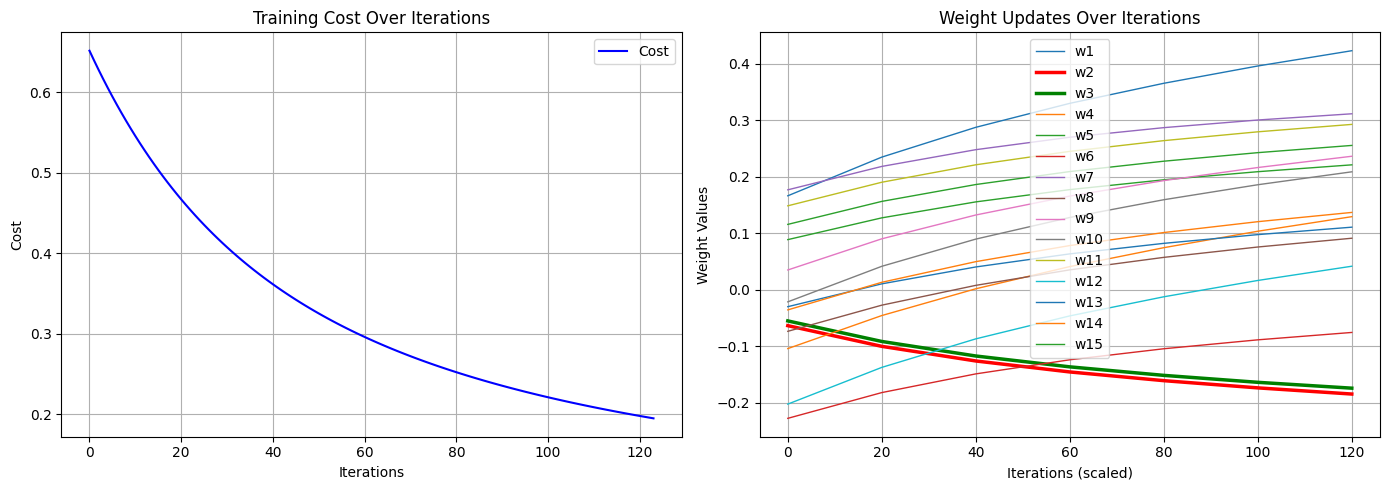

In [ ]:
def plot_training_progress(J_history, w_history):

    # Convert w_history into a 2D numpy array for easier plotting
    w_history_array = np.array(w_history)

    # Create subplots
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Plot cost history
    axes[0].plot(range(len(J_history)), J_history, color='b', label='Cost')
    axes[0].set_title("Training Cost Over Iterations")
    axes[0].set_xlabel("Iterations")
    axes[0].set_ylabel("Cost")
    axes[0].grid()
    axes[0].legend()

    # Scale x-axis for weight updates by multiplying by 20
    scaled_x = [i * 20 for i in range(w_history_array.shape[0])]

    # Plot weight updates for each weight over iterations
    for i in range(w_history_array.shape[1]):  # Loop over each weight dimension
        if i == 1:  # Highlight w2
            axes[1].plot(scaled_x, w_history_array[:, i],
                         label=f'w{i+1}', linewidth=2.5, color='r')  # Bold and red
        elif i == 2:  # Highlight w3
            axes[1].plot(scaled_x, w_history_array[:, i],
                         label=f'w{i+1}', linewidth=2.5, color='g')  # Bold and green
        else:  # Normal weight lines
            axes[1].plot(scaled_x, w_history_array[:, i],
                         label=f'w{i+1}', linewidth=1)

    axes[1].set_title("Weight Updates Over Iterations")
    axes[1].set_xlabel("Iterations (scaled)")
    axes[1].set_ylabel("Weight Values")
    axes[1].grid()
    axes[1].legend()

    plt.tight_layout()
    plt.show()

plot_training_progress(J_history, w_history)

#**Save Model**

In [ ]:
import pickle

def save_model(filename, w, b, scaler):
    model = {"weights": w, "bias": b, "scaler": scaler}
    with open(filename, "wb") as file:
        pickle.dump(model, file)
    print(f"Model saved to {filename}")

save_model("logistic_regression_model.pkl", w, b, scaler)

Model saved to logistic_regression_model.pkl


#**Auto Extract Feature Test**

In [ ]:
from bs4 import BeautifulSoup
import requests
from urllib.parse import urlparse, urljoin
import re

def count_self_references(url, soup):
    """
    Count the number of internal (self-referencing) links on the page.
    """
    domain = urlparse(url).netloc
    self_ref_count = 0

    for link in soup.find_all('a', href=True):
        href = urljoin(url, link['href'])
        if domain in urlparse(href).netloc:  # Check if the link belongs to the same domain
            self_ref_count += 1

    return self_ref_count

def check_social_links(soup):
    social_sites = ['facebook.com', 'twitter.com', 'linkedin.com', 'instagram.com', 'youtube.com', 'pinterest.com']
    has_social_net = 0

    for link in soup.find_all('a', href=True):
        if any(social in link['href'] for social in social_sites):  # Check if the link contains a social site domain
            has_social_net = 1
            break

    return has_social_net

def extract_features(url):

    response = requests.get(url)
    html = response.text
    soup = BeautifulSoup(html, 'html.parser')

    features = [
        80, #"URLSimilarityIndex"
        len(re.findall(r'[^\w]', url)),  # NoOfOtherSpecialCharsInURL
        len(re.findall(r'[^\w]', url)) / len(url),  # SpacialCharRatioInURL
        1 if urlparse(url).scheme == 'https' else 0,  # IsHTTPS
        len(html.split('\n')),  # LineOfCode
        50, #"DomainTitleMatchScore"
        50, #"URLTitleMatchScore"
        1 if soup.find('meta', attrs={"name": "viewport"}) else 0,  # IsResponsive
        1 if soup.find('meta', attrs={"name": "description"}) else 0,  # HasDescription
        check_social_links(soup), #"HasSocialNet"
        1 if soup.find('button') or soup.find('input', attrs={"type": "submit"}) else 0,  # HasSubmitButton
        1 if "©" in html or "copyright" in html.lower() else 0,  # HasCopyrightInfo
        len(soup.find_all('img')),  # NoOfImage
        len(soup.find_all('script')),  # NoOfJS
        count_self_references(url, soup) #"NoOfSelfRef"
    ]

    return [np.array(features)]

In [ ]:
Kafka = extract_features("https://kafka.apache.org/")
print(Kafka)

[array([8.000e+01, 6.000e+00, 2.400e-01, 1.000e+00, 1.019e+03, 5.000e+01,
       5.000e+01, 1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
       1.700e+01, 9.000e+00, 2.900e+01])]


In [ ]:
Kafka = scaler.transform(Kafka)  # Apply scaling only after training
# Test Accuracy
test_predictions = predict(Kafka, w, b)
print(test_predictions)

[0.]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:

min_values = X.min()
max_values = X.max()

# Display min and max values
for feature in X.columns:
    print(f"{feature}: min = {min_values[feature]}, max = {max_values[feature]}")


URLSimilarityIndex: min = 5.206704381, max = 100.0
NoOfOtherSpecialCharsInURL: min = 1.0, max = 12.0
SpacialCharRatioInURL: min = 0.018, max = 0.16
IsHTTPS: min = 0.0, max = 1.0
LineOfCode: min = 2.0, max = 11400.0
DomainTitleMatchScore: min = 0.0, max = 100.0
URLTitleMatchScore: min = 0.0, max = 100.0
IsResponsive: min = 0.0, max = 1.0
HasDescription: min = 0.0, max = 1.0
HasSocialNet: min = 0.0, max = 1.0
HasSubmitButton: min = 0.0, max = 1.0
HasCopyrightInfo: min = 0.0, max = 1.0
NoOfImage: min = 0.0, max = 264.0
NoOfJS: min = 0.0, max = 77.0
NoOfSelfRef: min = 0.0, max = 595.0
